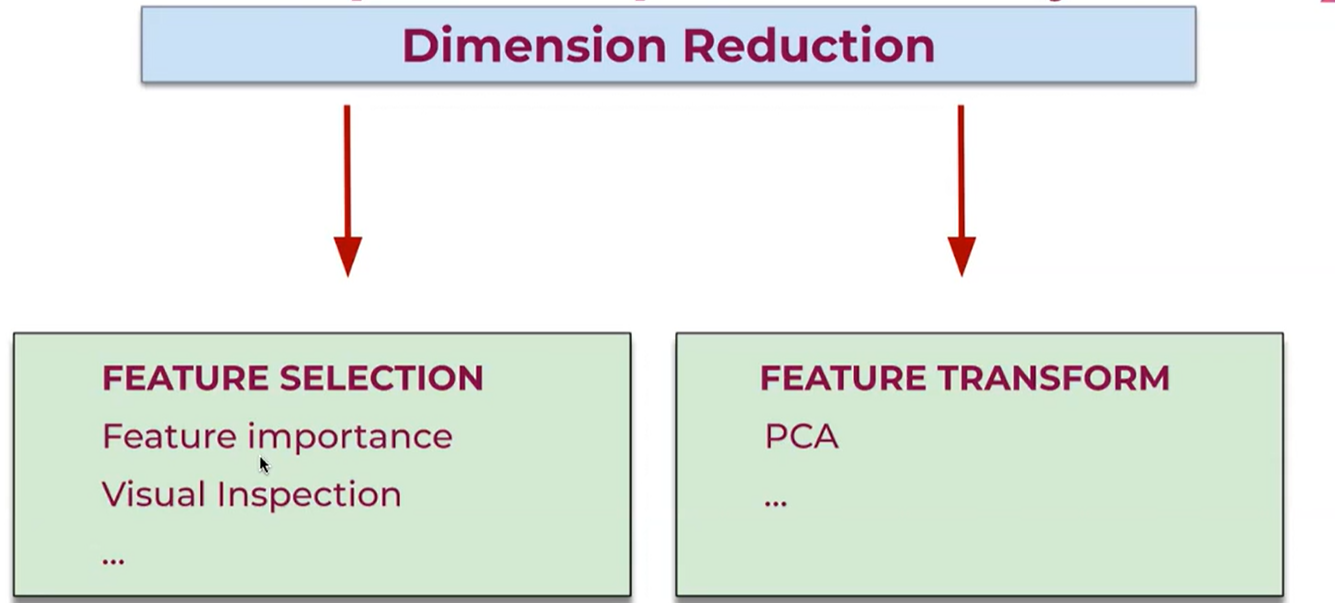

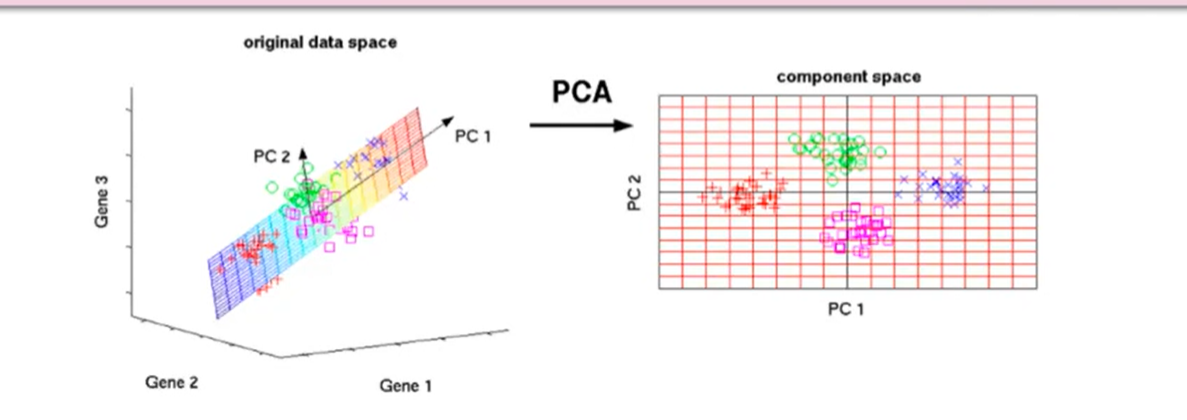

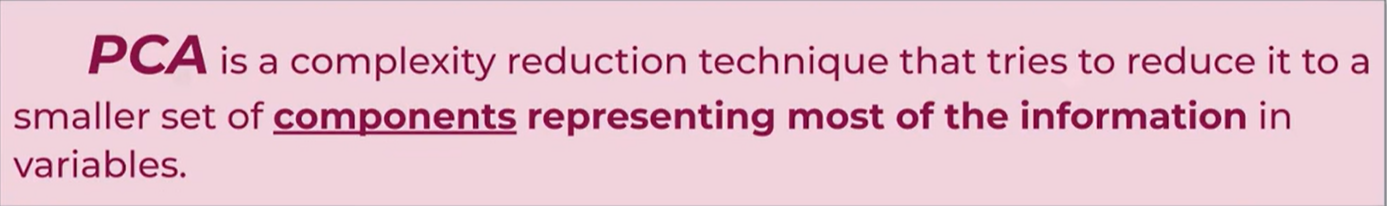

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


Veriler, Avrupalı kart sahipleri tarafından Eylül 2013'te iki gün boyunca gerçekleşen kredi kartı işlemlerini temsil etmektedir.

Veri seti,Université Libre de Bruxellesdeki Makine Öğrenimi Grubuna ve Andrea Dal Pozzolo ve ark.Kart sahiplerinin tüm ayrıntıları, bir temel bileşen analizi (PCA) dönüşümü aracılığıyla anonimleştirildi.Ek olarak, satın alma tutarı (muhtemelen Euro cinsinden) ile birlikte işlemler arasındaki süre saniye cinsinden sağlanır.

Spesifik olarak, toplam 284.807 işlemden 492'si sahte kredi kartı işlemi vardır ve bu da tüm işlemlerin yaklaşık %0.172'sine tekabül etmektedir.Pozitif sınıfın (dolandırıcılıkların) tüm işlemlerin %0,172'sini oluşturduğu veri kümesi oldukça dengesizdir…

Buradaki zorluk, kredi kartı şirketlerinin müşterilerinin satın almadıkları ürünler için ücret ödememesi için sahte kredi kartı işlemlerini( fraudulent credit card transactions ) tespit etmektir.

## bu problemin zorlukları nelerdir ?


--Muazzam Veriler her gün işlenir ve model oluşturma, dolandırıcılığa zamanında yanıt verecek kadar hızlı olmalıdır.


--Dengesiz Veriler, yani işlemlerin çoğu (%99,8) hileli değildir, bu da hileli olanları tespit etmeyi gerçekten zorlaştırır

--Veriler çoğunlukla özel olduğundan veri kullanılabilirliği.


-- Yanlış Sınıflandırılmış Veriler, her dolandırıcılık işlemi yakalanmadığı ve rapor edilmediği için başka bir önemli sorun olabilir.


-- Dolandırıcılar tarafından modele karşı kullanılan uyarlanabilir teknikler.

### roc değil de precision-recall'u kullanacağız (çok dengesiz)eğrinin altındaki alan, modelin performansı olarak rapor edilir.

## TARGET CLASS'IMIZIN 1 OLMASINA DİKKAT EDELİM ÇÜNKÜ PRECİSİON-RECALL EĞRİSİ 1 CLASS'INA ODAKLANARAK ÇİZİLİR.

Sınıf dengesizliği oranı göz önüne alındığında, precision-recal Eğrisinin Altındaki Alanı (AUPRC) kullanarak doğruluğu ölçmenizi öneririz.

PCA dönüştürülmüş özelliklerin pozitif ve negatif olduğunu ve çok sayıda float içerdiğini görebiliriz.

TIME sütununun yararlı olması muhtemel değildir ve muhtemelen kaldırılabilir.

PCA değişkenleri ile dolar miktarı arasındaki ölçek farkı, girdi değişkenlerinin ölçeğine duyarlı olan algoritmalar için data scaling kullanılması gerektiğini göstermektedir.

In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 --> Normal Transaction

1 --> fraudulent transaction

In [6]:
df.sample(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
103934,68857.0000,-1.0883,0.9420,1.0526,-0.4534,0.3291,-0.4730,0.2121,0.6058,-0.8897,-1.0334,1.4017,0.8019,-0.1248,0.1718,-0.0468,0.6693,-0.0589,-0.0870,-0.8346,-0.1829,-0.0413,-0.4259,0.0330,-0.0374,-0.4621,-0.0853,-0.0356,0.0227,1.2900,0
283647,171762.0000,0.0273,0.8408,0.1881,-0.7811,0.6496,-0.6044,0.9348,-0.0633,-0.3432,-0.2542,0.5543,0.9328,0.3809,0.2100,-1.1244,0.1778,-0.7985,-0.1978,0.3232,0.0077,-0.2255,-0.4847,0.0128,-0.3320,-0.4633,0.1393,0.2456,0.0848,3.5600,0
96735,65910.0000,1.2134,-0.5823,0.0136,-0.6945,-0.6492,-0.1440,-0.7195,0.1211,-0.9505,0.2732,1.6939,-0.1915,-0.0078,-1.0839,0.5831,1.6305,0.9449,-0.6619,0.3485,0.2106,0.1388,0.1826,-0.0742,-0.3837,0.2779,-0.2560,0.0291,0.0388,69.9000,0
236397,148790.0000,1.9888,0.2536,-2.0276,1.1523,0.8752,-0.9381,0.8455,-0.4509,-0.2366,0.3255,-0.6977,0.3694,0.3757,0.7178,0.2317,-0.4431,-0.4522,-0.5040,-0.4397,-0.1387,0.1503,0.4373,-0.0237,0.6870,0.4840,-0.5182,-0.0395,-0.0486,50.0000,0
116338,74236.0000,-0.6266,0.6560,2.5101,1.1925,-0.5259,-0.2601,-0.0454,0.0705,0.1845,-0.3472,-0.5055,0.5924,0.6095,-0.5430,0.2274,-0.4312,0.0813,0.0038,0.4974,-0.0219,0.0827,0.4613,-0.1150,0.7506,-0.4112,-0.4194,0.1149,0.1514,9.9900,0
179832,124258.0000,2.0691,0.0817,-2.0257,0.4337,0.4913,-1.5126,0.8215,-0.5814,0.3251,-0.0227,-0.9155,0.5048,0.1861,0.5823,-0.2352,-0.8650,-0.1742,-0.5654,0.2054,-0.1992,0.1405,0.6119,-0.1202,-0.0487,0.5836,-0.0650,-0.0549,-0.0711,27.0800,0
4531,3849.0000,-0.5384,1.0568,1.4813,0.1626,0.4683,-0.0196,0.7352,-0.1245,1.0582,-0.9067,-0.3918,-1.8993,3.0682,0.9184,-1.2536,-0.2693,0.4044,-0.1507,0.4854,0.2173,-0.3616,-0.5002,-0.2084,-0.4553,0.1300,0.2476,0.2921,0.1636,27.9300,0
78452,57535.0000,-2.4025,1.2016,0.3301,1.1463,-1.4991,0.5591,-1.3413,1.1376,0.6123,0.8600,0.7732,1.0612,-0.1931,0.2972,0.3759,-0.4235,0.7286,0.2370,1.6090,-0.5251,0.2456,0.7927,0.4810,0.0613,-1.6159,0.2376,-1.1446,-0.0142,21.0000,0


## fraudların miktarlarını gözden geçirelim..

In [7]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [8]:
fraud.shape

(492, 31)

## sadece fraudlara bakarak feature seçebilir miyiz ? 

In [9]:
legit["Amount"].describe()

count   284315.0000
mean        88.2910
std        250.1051
min          0.0000
25%          5.6500
50%         22.0000
75%         77.0500
max      25691.1600
Name: Amount, dtype: float64

In [10]:
fraud["Amount"].describe()

count    492.0000
mean     122.2113
std      256.6833
min        0.0000
25%        1.0000
50%        9.2500
75%      105.8900
max     2125.8700
Name: Amount, dtype: float64

## amount = 0 olan bir işlem nasıl fraud olabilir ? veri setindeki maximum legitmiş !!!

In [11]:
fraud[fraud["Amount"]==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0000,-2.3122,1.9520,-1.6099,3.9979,-0.5222,-1.4265,-2.5374,1.3917,-2.7701,-2.7723,3.2020,-2.8999,-0.5952,-4.2893,0.3897,-1.1407,-2.8301,-0.0168,0.4170,0.1269,0.5172,-0.0350,-0.4652,0.3202,0.0445,0.1778,0.2611,-0.1433,0.0000,1
8842,12093.0000,-4.6968,2.6939,-4.4751,5.4677,-1.5568,-1.5494,-4.1042,0.5539,-1.4985,-4.5950,5.2755,-11.3490,0.3745,-8.1387,0.5486,-6.6536,-10.2468,-4.1911,0.9915,-0.1590,0.5739,-0.0802,0.3184,-0.2459,0.3382,0.0323,-1.5085,0.6081,0.0000,1
23308,32686.0000,0.2880,1.7287,-1.6522,3.8135,-1.0909,-0.9847,-2.2023,0.5551,-2.0339,-2.7342,2.3684,-3.6568,-0.1695,-4.7444,0.7652,-2.4795,-4.9311,-2.5474,-0.9027,0.2653,0.2622,-0.6335,0.0929,0.1876,0.3687,-0.1325,0.5766,0.3098,0.0000,1
42756,41233.0000,-10.6458,5.9183,-11.6710,8.8074,-7.9755,-3.5868,-13.6168,6.4282,-7.3685,-12.8882,6.8550,-13.2117,1.0356,-13.7790,1.0404,-11.2903,-20.5780,-7.5478,3.1185,-0.0462,2.5720,0.2068,-1.6678,0.5584,-0.0279,0.3543,0.2733,-0.1529,0.0000,1
69980,53658.0000,-1.7393,1.3445,-0.5344,3.1953,-0.4162,-1.2620,-2.3410,0.7130,-1.4163,-2.9967,0.7475,-4.5966,-1.9278,-4.7571,-1.2478,-2.5355,-5.3565,-1.9747,-0.6037,0.0027,0.3832,-0.2140,-0.3366,0.2371,0.2460,-0.0442,0.5107,0.2210,0.0000,1
93486,64443.0000,1.0795,0.8730,-0.3039,2.7554,0.3017,-0.3503,-0.0428,0.2466,-0.7792,-0.1577,1.9286,-0.9359,-2.4314,-1.6335,0.5343,1.4256,1.5935,1.1785,-1.5687,-0.2521,-0.0233,-0.1586,-0.0388,-0.0603,0.3583,0.0770,0.0189,0.0606,0.0000,1
93788,64585.0000,1.0804,0.9628,-0.2781,2.7433,0.4124,-0.3208,0.0413,0.1762,-0.9670,-0.1941,2.1401,-0.2763,-1.1913,-1.8803,0.3983,1.3674,1.5227,1.0263,-1.5771,-0.1727,-0.0090,-0.0570,-0.0537,-0.0264,0.4003,0.0728,0.0270,0.0632,0.0000,1
141257,84204.0000,-0.9378,3.4629,-6.4451,4.9322,-2.2340,-2.2916,-5.6956,1.3388,-4.3224,-8.0991,7.1830,-9.4459,-0.3146,-12.9915,-0.1364,-6.3675,-12.7344,-3.8451,1.0077,1.1295,1.0666,-0.5217,-0.3199,-0.4059,0.9068,1.1658,1.3745,0.7299,0.0000,1
141258,84204.0000,-0.9378,3.4629,-6.4451,4.9322,-2.2340,-2.2916,-5.6956,1.3388,-4.3224,-8.0991,7.1830,-9.4459,-0.3146,-12.9915,-0.1364,-6.3675,-12.7344,-3.8451,1.0077,1.1295,1.0666,-0.5217,-0.3199,-0.4059,0.9068,1.1658,1.3745,0.7299,0.0000,1
143333,85285.0000,-7.0303,3.4220,-9.5251,5.2709,-4.0246,-2.8657,-6.9892,3.7916,-4.6227,-8.4097,6.3090,-8.5768,0.2467,-11.5340,-0.3643,-5.4525,-11.8876,-3.5636,0.8760,0.5457,1.1034,-0.5419,0.0369,-0.3555,0.3536,1.0425,1.3595,-0.2722,0.0000,1


In [12]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.2023,0.0083,-0.0063,0.0122,-0.0079,0.0055,0.0024,0.0096,-0.0010,0.0045,0.0098,-0.0066,0.0108,0.0002,0.0121,0.0002,0.0072,0.0115,0.0039,-0.0012,-0.0006,-0.0012,-0.0000,0.0001,0.0002,-0.0001,-0.0001,-0.0003,-0.0001,88.2910
1,80746.8069,-4.7719,3.6238,-7.0333,4.5420,-3.1512,-1.3977,-5.5687,0.5706,-2.5811,-5.6769,3.8002,-6.2594,-0.1093,-6.9717,-0.0929,-4.1399,-6.6658,-2.2463,0.6807,0.3723,0.7136,0.0140,-0.0403,-0.1051,0.0414,0.0516,0.1706,0.0757,122.2113


In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


Yukarıdaki istatistikleri incelemek, V1-V28 özniteliklerinin sıfır merkezli olduğunu ortaya çıkarır, ancak diğer iki giriş özniteliği Zaman ve Miktar için durum böyle değildir.

## normal işlemlerdeki v'ler 0.001

## v'leri - olan ve 1'i geçenler : v(1 3 5 6 7 9 10 12 14 16 17 18)

## v'leri +  olan ve 1'i geçenler : v(2 4 11 )

In [14]:
fraud[fraud["Amount"]==0].groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100142.7778,-3.0949,3.2231,-5.8463,5.4137,-0.7061,-1.6115,-4.7414,-0.1862,-3.4288,-5.3526,4.0978,-6.0742,-0.3249,-7.8369,-0.3977,-2.6406,-5.0371,-1.2369,-0.3239,0.7277,-0.1951,-0.0333,0.0212,-0.1184,0.1047,0.2265,0.2317,0.1231,0.0000


## 5 ve 18 'de gözümüze çarptı.

### Under-Sampling

Normal işlemlerin ve Sahte İşlemlerin benzer dağılımını içeren örnek bir veri kümesi oluşturun

In [15]:
legit.sample(492)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132347,79951.0000,-0.2828,0.7959,0.7222,-0.3775,1.1019,0.3529,0.6340,0.1615,-0.4884,-0.4134,-0.5413,-0.1634,-0.2685,0.3422,-0.1623,1.0023,-1.5574,1.1263,-0.0270,-0.1241,0.0743,0.1310,-0.4798,-1.4086,0.5236,-0.3539,0.0047,-0.0200,1.9900,0
240736,150724.0000,-1.7525,-2.7952,-1.7095,0.0908,4.1928,-3.0418,0.3056,-0.4378,-0.1715,0.1451,0.1622,0.2813,-0.9994,1.1213,-1.2710,-0.8843,-0.6921,0.3904,0.1263,0.8194,0.8445,1.6275,0.6959,-0.4381,-0.9267,-0.2643,-0.0216,0.1589,142.4200,0
123465,76937.0000,1.3074,-1.2686,0.8091,-1.4538,-1.5898,0.0015,-1.2883,0.1046,-1.9841,1.4910,1.5563,0.2300,1.0489,-0.3476,0.3174,-0.2308,0.3808,0.0629,-0.4110,-0.1979,-0.1605,-0.1816,0.1055,-0.0094,0.0453,-0.3276,0.0584,0.0282,65.0000,0
232495,147193.0000,1.9046,0.5245,-0.7391,3.6303,0.6070,0.2768,0.1346,-0.0475,-1.2179,1.6156,0.1898,0.7843,0.9218,0.1562,-1.6231,0.9730,-1.1954,0.3040,-1.2131,-0.2031,0.3263,1.0595,-0.0808,-0.3668,0.2690,0.2450,-0.0325,-0.0636,10.6200,0
88021,61949.0000,0.7995,-0.3230,0.2735,1.2134,0.0684,0.9721,-0.1444,0.4319,0.1577,-0.1362,0.5809,-0.1332,-1.5561,0.7895,2.1791,-1.1275,0.9387,-1.9153,-2.1762,-0.1488,0.2645,0.6274,-0.0258,-0.6672,0.2224,-0.1795,0.0586,0.0275,119.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19485,30319.0000,-0.0741,-0.4521,1.1792,-2.2868,-0.5997,0.3577,-0.4808,0.2333,-2.4682,1.1416,0.3320,-1.3497,-0.7555,0.0062,0.0973,-0.3034,0.3244,0.6006,0.1698,-0.3265,-0.1204,-0.0551,-0.1543,-0.8727,-0.1039,-0.1796,0.0824,0.0362,20.0000,0
122199,76473.0000,1.0519,0.4105,1.2623,2.5932,-0.5338,-0.1225,-0.2260,0.0534,-0.5972,0.6008,0.2115,0.4919,0.6957,-0.0030,0.9031,0.4553,-0.3261,-0.6046,-1.7891,-0.1109,0.2213,0.6572,0.0146,0.6255,0.3088,0.0901,0.0315,0.0361,21.1900,0
150380,93242.0000,-2.6237,3.0045,-1.1669,-1.0407,1.2043,0.3770,0.2667,-4.9236,3.0741,1.5889,0.1841,-3.0791,0.9599,-0.4889,-0.7643,-0.0970,1.0859,0.1416,-0.4526,-0.2416,3.2043,-2.1636,0.4439,-0.0795,0.0181,0.1498,-0.5201,-0.2016,21.1000,0
64699,51265.0000,0.2610,-1.5765,0.2161,1.2101,-0.5498,1.3582,-0.0996,0.2631,0.4416,-0.2474,0.2962,1.1139,0.9375,-0.1288,0.2447,0.5174,-0.8274,0.6516,-0.2142,0.8825,0.4189,0.3583,-0.6395,-1.0769,0.4158,-0.2262,-0.0039,0.0936,474.7900,0


In [16]:
legit_sample = legit.sample(492)

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [18]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
229551,145965.0000,1.9177,-0.4629,-1.1310,0.3113,0.0286,0.0723,-0.2913,0.0974,0.6476,0.2494,0.3937,0.4227,-0.8096,0.4691,-0.2245,0.4019,-0.7268,0.2862,0.2287,-0.1284,0.0108,-0.0274,0.1719,0.2894,-0.2235,0.1995,-0.0605,-0.0542,54.9500,0
256041,157515.0000,-0.4978,1.3915,-3.0235,1.1602,-0.9147,-0.6052,2.6735,0.0085,-1.0266,-0.1693,-1.6295,-0.3892,-0.7142,1.6017,-0.3416,-0.8595,0.2317,0.0883,0.5156,-0.2603,0.5718,1.7671,0.2941,-0.0642,-1.0150,-0.3544,0.3711,0.1828,397.6300,0
129886,79234.0000,-1.3230,-1.5430,0.2070,-1.3964,-1.6244,0.7656,2.2293,-0.0062,-1.5195,-0.3605,0.3185,-0.7041,-1.6347,0.4915,-0.9393,-1.4422,0.0040,1.2843,-1.1070,0.5944,0.0373,-0.4474,1.2074,-0.3768,-0.1091,0.9061,-0.1617,0.1377,575.0400,0
211174,138292.0000,-2.2683,1.2331,0.4192,-1.0641,-1.0712,-0.5856,-0.5252,0.7256,1.4415,0.4252,0.1338,-0.7841,-3.5294,0.7332,0.0291,0.6269,-0.4479,0.7089,0.1162,-0.4952,-0.1027,-0.6012,0.2608,-0.0614,-0.3075,-0.3826,-1.1648,-0.1269,0.6800,0
29641,35563.0000,1.2282,-0.5038,0.3843,0.0097,-0.6646,0.0845,-0.4444,0.0499,-1.0216,0.7297,1.1161,1.2590,0.7574,-0.0630,-0.9566,-2.0164,0.3189,0.6185,-0.6240,-0.4670,-0.4212,-0.5628,0.0151,0.0539,0.3846,0.3770,0.0086,0.0043,28.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0000,-1.9279,1.1257,-4.5183,1.7493,-1.5665,-2.0105,-0.8828,0.6972,-2.0649,-5.5878,2.1158,-5.4174,-1.2351,-6.6652,0.4017,-2.8978,-4.5705,-1.3151,0.3912,1.2530,0.7786,-0.3192,0.6394,-0.2949,0.5375,0.7884,0.2927,0.1480,390.0000,1
280143,169347.0000,1.3786,1.2894,-5.0042,1.4118,0.4426,-1.3265,-1.4132,0.2485,-1.1274,-3.2322,2.8585,-3.0969,-0.7925,-5.2101,-0.6138,-2.1553,-3.2671,-0.6885,0.7377,0.2261,0.3706,0.0282,-0.1456,-0.0810,0.5219,0.7395,0.3892,0.1866,0.7600,1
280149,169351.0000,-0.6761,1.1264,-2.2137,0.4683,-1.1205,-0.0033,-2.2347,1.2102,-0.6522,-3.4639,1.7950,-2.7750,-0.4190,-4.0572,-0.7126,-1.6030,-5.0353,-0.5070,0.2663,0.2480,0.7518,0.8341,0.1909,0.0321,-0.7397,0.4711,0.3851,0.1944,77.8900,1
281144,169966.0000,-3.1138,0.5859,-5.3997,1.8171,-0.8406,-2.9435,-2.2080,1.0587,-1.6323,-5.2460,1.9335,-5.0305,-1.1275,-6.4166,0.1412,-2.5495,-4.6147,-1.4781,-0.0355,0.3063,0.5833,-0.2692,-0.4561,-0.1837,-0.3282,0.6061,0.8849,-0.2537,245.0000,1


In [19]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,93507.7825,0.0659,-0.0001,0.0265,-0.0368,-0.0523,0.0848,-0.0137,0.0383,0.0029,-0.0038,0.0052,0.0226,-0.0174,0.0232,-0.0371,0.0117,-0.0148,0.0725,-0.0609,-0.0408,0.0590,-0.0108,0.0234,0.0019,-0.0125,0.0285,-0.0147,-0.0160,87.2956
1,80746.8069,-4.7719,3.6238,-7.0333,4.5420,-3.1512,-1.3977,-5.5687,0.5706,-2.5811,-5.6769,3.8002,-6.2594,-0.1093,-6.9717,-0.0929,-4.1399,-6.6658,-2.2463,0.6807,0.3723,0.7136,0.0140,-0.0403,-0.1051,0.0414,0.0516,0.1706,0.0757,122.2113


In [21]:
new_dataset.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5444,5442.0000,1.1269,0.0193,0.8264,0.9809,-0.4285,0.1163,-0.4034,0.0920,1.6368,-0.4574,2.2518,-1.2330,1.3587,1.4960,-1.5936,-0.5476,0.9287,-0.3020,-0.1618,-0.1987,-0.1469,0.0667,-0.0342,0.2225,0.4298,0.3997,-0.0302,-0.0072,6.9900,0
10568,17520.0000,-5.2681,9.0676,-15.9607,10.2966,-4.7082,-3.3954,-11.1611,5.5000,-5.6674,-11.6272,11.0271,-16.3881,0.3639,-17.2302,-0.4375,-10.1224,-13.6392,-4.9865,1.1268,1.4559,2.0041,0.1911,0.6229,-1.2093,-0.3748,0.6488,1.5847,0.7201,1.0000,1
2947,2494.0000,1.1123,-0.9025,0.4309,0.4460,-0.8637,0.5460,-0.7774,0.1950,-0.2191,0.6414,-1.6575,-0.8068,-0.7784,-0.0240,0.7675,-1.4293,-0.0168,1.4129,-1.1816,-0.4163,-0.2218,-0.2470,-0.2029,-0.8148,0.4857,-0.1474,0.0662,0.0376,111.5000,0
154587,102114.0000,-28.2551,21.4672,-26.8713,11.7374,-17.9996,6.0659,-41.5068,-38.9873,-13.4341,-24.4032,3.4093,-9.6083,-3.0763,0.2401,-2.8367,-6.5948,-12.9575,-5.6135,-0.2488,10.4407,-21.4537,8.3620,4.9091,0.0983,-1.5087,0.0087,-5.4078,-0.1838,0.0000,1
73120,54988.0000,-0.2389,0.5952,1.3343,-0.1842,0.3809,-1.0832,1.3106,-0.7468,-0.3290,0.1685,-0.0997,-0.2516,-0.0347,-0.0641,1.0340,-0.4158,-0.1817,-0.8044,1.1027,0.1513,-0.4168,-0.9093,0.0565,0.4117,-0.9115,0.5491,-0.3578,-0.3210,43.9500,0
154670,102489.0000,-2.2970,4.0640,-5.9577,4.6800,-2.0809,-1.4633,-4.4908,1.0292,-1.5932,-8.9938,7.8645,-10.6498,1.8266,-12.9136,-0.7663,-7.9541,-7.8096,-1.7185,3.8330,1.2650,1.0891,0.9754,-0.6255,-0.5352,0.2474,0.1604,0.9696,0.3350,104.0000,1
9252,13323.0000,-5.4544,8.2874,-12.7528,8.5943,-3.1060,-3.1799,-9.2528,4.2451,-6.3298,-13.1367,11.2285,-17.1313,-0.1694,-18.0500,-1.3662,-9.7236,-14.7449,-5.2473,-0.5747,1.3059,1.8462,-0.2672,-0.3108,-1.2017,1.3522,0.6084,1.5747,0.8087,1.0000,1
10630,17838.0000,-5.1879,6.9677,-13.5109,8.6179,-11.2144,0.6722,-9.4625,5.3287,-4.8970,-11.7868,9.3691,-15.0942,1.2564,-11.8522,0.2744,-10.6882,-18.3888,-6.8988,2.3828,-0.6237,2.0861,0.7602,0.7168,-0.6467,-1.6170,0.1723,0.6266,-0.1697,766.3600,1
90316,62965.0000,1.0293,0.0334,1.2478,2.6504,-0.6197,0.4549,-0.4718,0.1734,0.1259,0.4606,-1.3864,0.0440,0.2104,-0.4432,-0.2668,0.7712,-0.5980,-0.0336,-0.6768,-0.0047,-0.0771,-0.2151,-0.0772,-0.1204,0.3414,-0.0196,0.0300,0.0426,68.2500,0
255778,157399.0000,-0.2565,1.1776,-0.5860,-0.5619,0.5391,-0.5796,0.5685,0.3505,-0.4874,-0.3469,0.6633,0.8708,0.1808,0.8862,-0.2635,-0.1180,-0.5779,0.6936,0.3210,-0.0861,0.4603,1.4091,-0.0587,0.8076,-0.7768,-0.2741,0.3783,0.2578,0.8900,0


In [22]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [23]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       393
           1       0.98      0.93      0.95       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



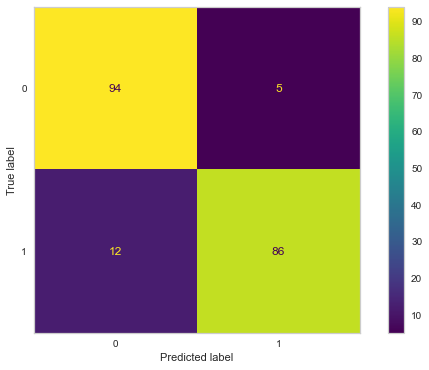

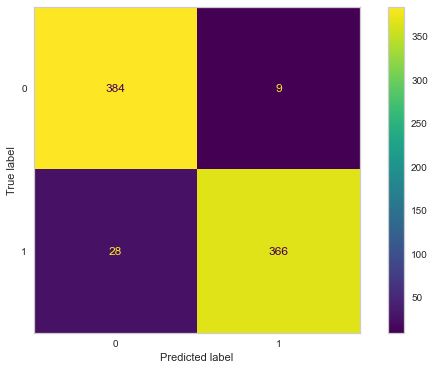

In [27]:
eval_metric(model, X_train, y_train, X_test, y_test)

In [28]:
model =  LogisticRegression()
scores = cross_validate(model, X_train, y_train, scoring = "accuracy", cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_score,train_score
1,0.0977,0.0010,0.9241,0.9548
2,0.0336,0.0168,0.9494,0.9477
3,0.0455,0.0026,0.9367,0.9520
4,0.0215,0.0024,0.9494,0.9534
5,0.0182,0.0020,0.9114,0.9534
6,0.0254,0.0030,0.8734,0.9308
7,0.0192,0.0000,0.9494,0.9223
8,0.0225,0.0024,0.9615,0.9520
9,0.0307,0.0020,0.9487,0.9506
10,0.0276,0.0010,0.9744,0.9464


In [29]:
df_scores.mean()[2:]

test_score    0.9378
train_score   0.9463
dtype: float64

### ayrı birisi

In [30]:
import collections

In [31]:
target = df.values[:,-1]
counter = collections.Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


Her biri için bir histogram oluşturarak girdi değişkenlerinin dağılımına da bakabiliriz.Çok sayıda değişken nedeniyle, çizimler darmadağın görünebilir.

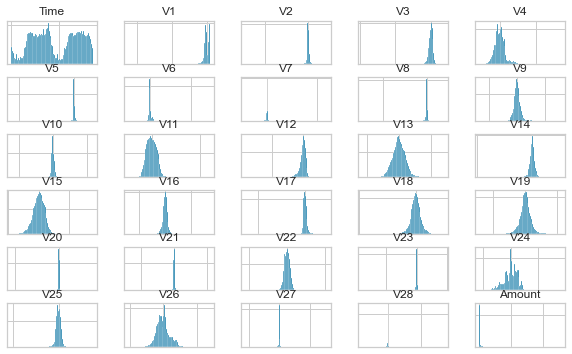

In [32]:
# drop the target variable
df2 = df.drop("Class", axis=1)
# create a histogram plot of each numeric variable
ax = df2.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
# show the plot
plt.show()

### PCA bileşenlerinin çoğunun dağılımının Gauss olduğunu ve birçoğunun sıfır etrafında ortalanabileceğini görebiliriz, bu da değişkenlerin PCA dönüşümünün bir parçası olarak standartlaştırıldığını düşündürür.

Miktar değişkeni ilginç olabilir ve histogramda görünmez.Bu, miktar değerlerinin dağılımının çarpık olabileceğini düşündürmektedir. İşlem boyutları hakkında daha iyi bir fikir edinmek için bu değişkenin 5 haneli bir özetini oluşturabiliriz.

In [33]:
df["Amount"].describe()

count   284807.0000
mean        88.3496
std        250.1201
min          0.0000
25%          5.6000
50%         22.0000
75%         77.1650
max      25691.1600
Name: Amount, dtype: float64

çoğu miktarın küçük olduğunu görebiliriz, ortalama yaklaşık 88 ve gözlemlerin orta yüzde 50'si 5 ile 77 arasındadır.
En büyük değer yaklaşık 25.691'dir ve bu da dağılımı yukarı çeker ve aykırı değer olabilir (örneğin, birisi kredi kartıyla araba satın almış)  BURAYA BİR BOX-PLOT ATILABİLİR.

        We will evaluate candidate models using repeated stratified k-fold cross-validation.
        Aday modelleri tekrarlanan tabakalı k-kat çapraz doğrulama kullanarak değerlendireceğiz.

In [34]:
X = df.drop("Class",axis=1)
y = df.Class

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
# calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, probas_pred)
# calculate area under curve
    return auc(r, p)

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,RepeatedStratifiedKFold,cross_val_score

In [38]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation the metric
    metric = make_scorer(pr_auc, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [39]:
from numpy import mean
from numpy import std

In [40]:
model = DecisionTreeClassifier()

In [41]:
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean PR AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean PR AUC: nan (nan)


        Decision Tree (CART)
        k-Nearest Neighbors (KNN)
        Random Forest (RF)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

#### KNN algoritmasına girdi olarak sağlamadan önce girdi değişkenlerini standartlaştıracağız.

### Her modeli sırayla tanımlayacağız ve sırayla değerlendirebilmemiz için bir listeye ekleyeceğiz.
### Aşağıdaki get_models() işlevi, değerlendirme için modellerin listesini ve sonuçları daha sonra çizmek için model kısa adlarının bir listesini tanımlar.

In [43]:
def get_models():
    models, names = list(), list()
    # CART
    models.append(DecisionTreeClassifier())
    names.append('CART')
    
    
    # KNN
    steps = [('s',StandardScaler()),('m',KNeighborsClassifier())]
    models.append(Pipeline(steps=steps))
    names.append('KNN')
    
     # RF
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
   
    return models, names

In [44]:
# # define models
# models, names = get_models()
# results = list()
# # evaluate each model
# for i in range(len(models)):
#     # evaluate the model and store results
#     scores = evaluate_model(X, y, models[i])
#     results.append(scores)
#     # summarize performance
#     print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

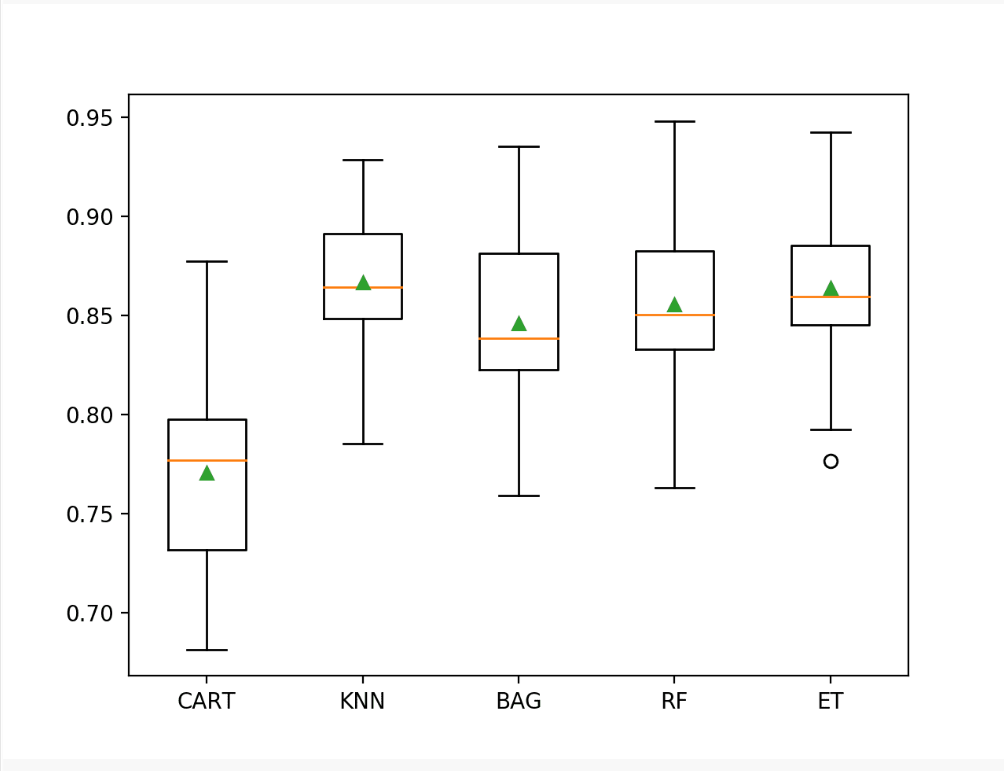

In [45]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

NameError: name 'results' is not defined

KNN ve karar ağaçları toplulukları için puan dağılımlarının sıkı olduğunu ve ortalamaların medyanlarla çakıştığını görebiliriz, bu da dağılımların simetrik olabileceğini ve muhtemelen Gauss olduğunu ve puanların muhtemelen oldukça kararlı olduğunu düşündürür.

## uygun bir threshold seçme işlemi imbalanced datalarda nasıl yapılır ???

## class_weight meselesi önemli.

## ayrı

In [46]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


In [47]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

Tüm işlemlerden sadece %0,17 hileli işlem çıktı.

In [48]:
fraud.Amount.describe()

count    492.0000
mean     122.2113
std      256.6833
min        0.0000
25%        1.0000
50%        9.2500
75%      105.8900
max     2125.8700
Name: Amount, dtype: float64

In [49]:
valid.Amount.describe()

count   284315.0000
mean        88.2910
std        250.1051
min          0.0000
25%          5.6500
50%         22.0000
75%         77.0500
max      25691.1600
Name: Amount, dtype: float64

### Buradan da açıkça anladığımız gibi, hileli olanlar için ortalama Money işlemi daha fazladır.

## Korelasyon matrisi bize özelliklerin birbirleriyle nasıl ilişkili olduğuna dair grafiksel bir fikir verir ve tahmin için en uygun özelliklerin neler olduğunu tahmin etmemize yardımcı olabilir.

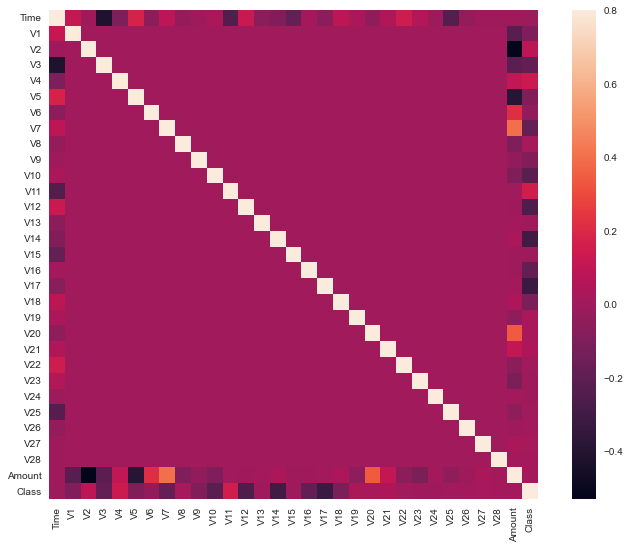

In [50]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

### HeatMap'te, özelliklerin çoğunun diğer özelliklerle ilişkili olmadığını açıkça görebiliriz,



### ancak birbirleriyle pozitif veya negatif korelasyona sahip bazı özellikler vardır.

## Örneğin, V2 ve V5, Amount adı verilen feature ile yüksek oranda negatif ilişkilidir.

## Ayrıca V20 ve Amount ile bir miktar korelasyon görüyoruz.

In [51]:
X = df.drop(['Class'], axis = 1)
y =df["Class"]

In [52]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [53]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [54]:
rfc = RandomForestClassifier(max_depth=6,random_state=42)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.98      0.79      0.87       394

    accuracy                           1.00    227845
   macro avg       0.99      0.89      0.94    227845
weighted avg       1.00      1.00      1.00    227845



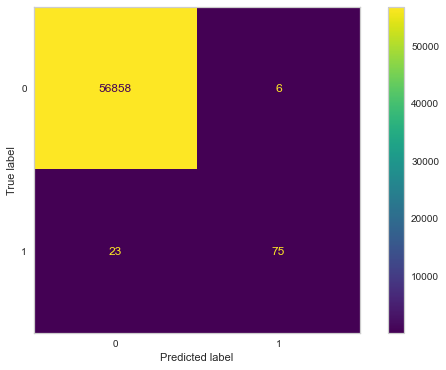

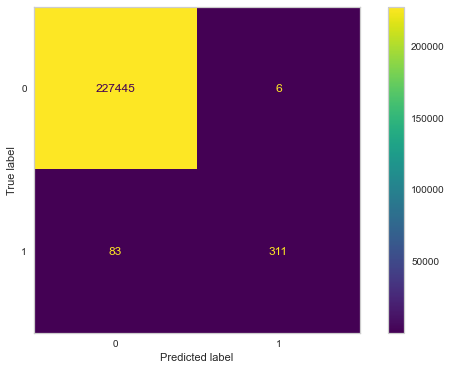

In [56]:
eval_metric(rfc, X_train, y_train, X_test, y_test)

## ayrı

Kredi kartı şirketlerinin, müşterilerin satın almadıkları ürünlere ücret ödememeleri için sahte kredi kartı işlemlerini fark edebilmeleri önemlidir.

## kesinlikle PCA inanmıyorsan korelasyon matrisine bak. PCA UYGULANMAYAN SÜTUNLAR ZATEN TIME VE AMOUNT , CLASS

### 'Amount' özelliği işlem Tutarıdır, bu özellik örneğin cost-senstive learning için kullanılabilir.

In [57]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


In [58]:
df["Time"].nunique()

124592

In [59]:
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier 
import xgboost
# import DMatrix
from sklearn import metrics
from datetime import datetime

<AxesSubplot:title={'center':'Class distribution of the target variable'}>

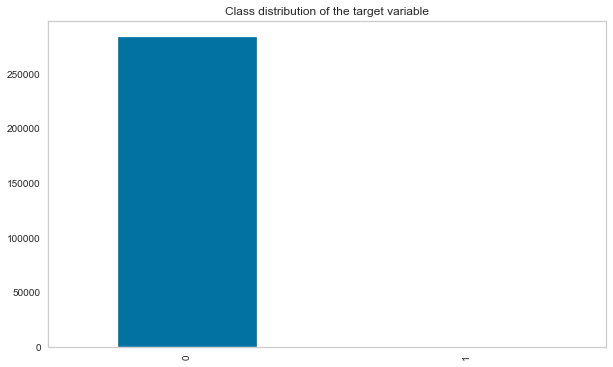

In [60]:
value_counts = df["Class"].value_counts()
value_counts.plot(kind="bar", title="Class distribution of the target variable")

In [61]:
df[["Amount", "Time"]].describe()

,Amount,Time
count,284807.0000,284807.0000
mean,88.3496,94813.8596
std,250.1201,47488.1460
min,0.0000,0.0000
25%,5.6000,54201.5000
50%,22.0000,84692.0000
75%,77.1650,139320.5000
max,25691.1600,172792.0000


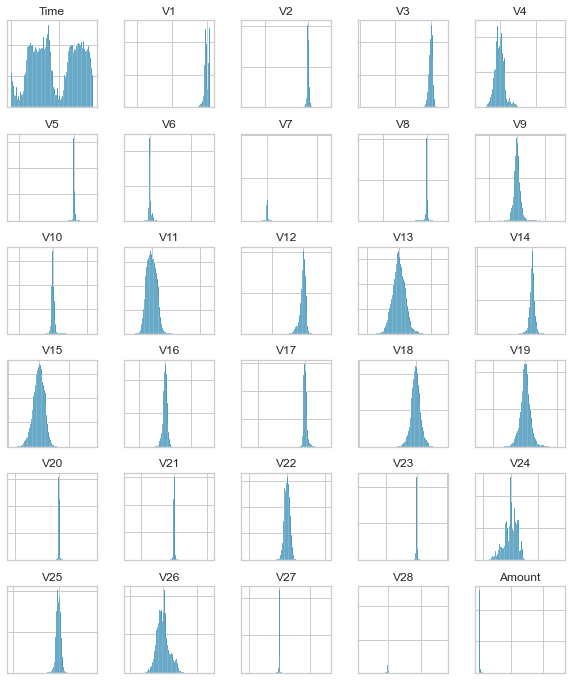

In [62]:
ax = df.drop("Class", axis=1).hist(figsize=(10,12),bins=100)
# We hide the axes' labels to make the plot neater and more compact
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

### Ana bileşenler hakkında yapabileceğimiz pek bir şey yok, ancak amount ve time  özellikleri daha ayrıntılı bir incelemeyi hak ediyor gibi görünüyor.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
df["Time"]                 # seconds          -----------------------> timestamp

0             0.0000
1             0.0000
2             1.0000
3             1.0000
4             2.0000
             ...    
284802   172786.0000
284803   172787.0000
284804   172788.0000
284805   172788.0000
284806   172792.0000
Name: Time, Length: 284807, dtype: float64

### Bunu yerel tarihe dönüştürebilir ve işlem saatinin bir işlemin hileli olma olasılığı ile ilişkili olup olmadığını belirleme girişiminde bulunarak saatleri çıkarabiliriz.

In [65]:
datetime.fromtimestamp

<function datetime.fromtimestamp>

In [66]:
df["Hour"] = df["Time"].apply(datetime.fromtimestamp).dt.hour

In [67]:
df["Hour"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23,  0,  1,  2], dtype=int64)

In [68]:
len(df["Hour"].unique())

24

### fromtimestamp() işlevi, belirtilen bir zaman damgasına karşılık gelen tarihi döndürmek için kullanılır.

In [69]:
df["Time"].apply(datetime.fromtimestamp)

0        1970-01-01 03:00:00
1        1970-01-01 03:00:00
2        1970-01-01 03:00:01
3        1970-01-01 03:00:01
4        1970-01-01 03:00:02
                 ...        
284802   1970-01-03 02:59:46
284803   1970-01-03 02:59:47
284804   1970-01-03 02:59:48
284805   1970-01-03 02:59:48
284806   1970-01-03 02:59:52
Name: Time, Length: 284807, dtype: datetime64[ns]

## bu bozuk bir kod olabilir DİKKAT

### fromtimestamp() işlevi, belirtilen bir timestamp'e karşılık gelen tarihi döndürmek için kullanılır.

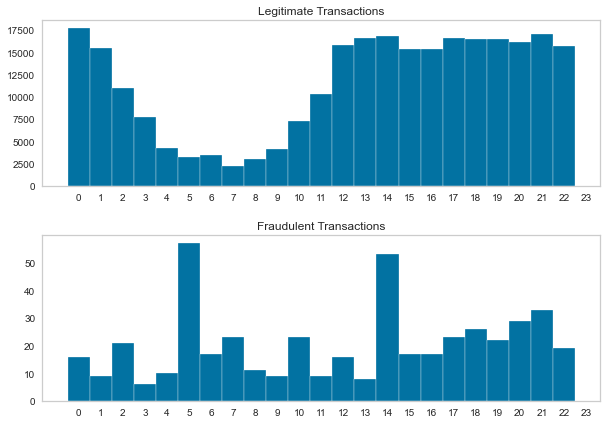

In [70]:
df["Hour"] = df["Time"].apply(datetime.fromtimestamp).dt.hour
fig, ax = plt.subplots(2, figsize=(10,7))
for a in ax:
    a.set_xticks(range(24))
df.loc[df["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
df.loc[df["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

### Meşru işlemlerin gece saatlerinde düştüğü ve iş gününün başlamasıyla birlikte oranlarının arttığı görülüyor.

### Buna karşılık, saat 2 civarında - öğlen -olağandışı görünen bir dolandırıcılık zirvesi var.


###

In [71]:
def compare_leg_fraud(attribute):
    leg_trS = df.loc[df["Class"] == 0][attribute].rename("Legitimate").describe()
    frd_trS = df.loc[df["Class"] == 1][attribute].rename("Fraudulent").describe()
    tr_hourDF = leg_trS.to_frame().join(frd_trS.to_frame())
    return tr_hourDFcompare_leg_fraud("Hour")

In [72]:
compare_leg_fraud("Amount")

NameError: name 'tr_hourDFcompare_leg_fraud' is not defined

### Şimdi dikkatimizi işlem tutarına kaydırıyoruz. Hileli ve yasal işlemlerin dağılımını histogramlar aracılığıyla görselleştirelim.

In [ ]:
fig, ax = plt.subplots(2, figsize=(9,7))
df.loc[df["Class"] == 0]["Amount"].hist(bins=30, ax=ax[0])
df.loc[df["Class"] == 1]["Amount"].hist(bins=30, ax=ax[1])
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

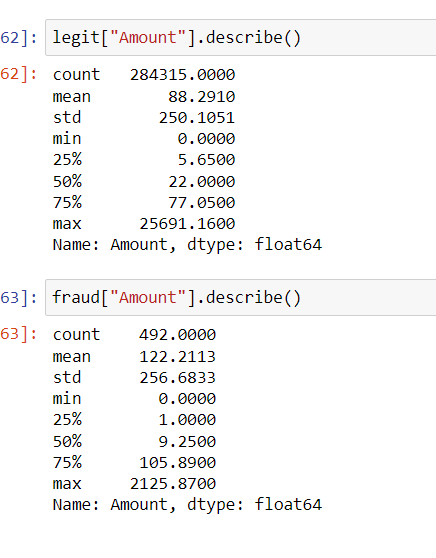








### Toplam tutar mutlak olarak önemli ölçüde daha düşük olmasına rağmen, hileli işlemler için ortalama işlem tutarı daha yüksek gibi görünüyor

In [73]:
fraud["Amount"].sum()

60127.97

In [74]:
legit["Amount"].sum()

25102462.04

### Ayrıca en sık yapılan 5 meşru işleme de bakabiliriz

In [79]:
(df.loc[df["Class"] == 0]["Amount"].value_counts().head())

1.0000     13575
1.9800      6044
0.8900      4872
9.9900      4746
15.0000     3280
Name: Amount, dtype: int64

In [75]:
(df.loc[df["Class"] == 0]["Amount"].value_counts(normalize=True)*100).head()

1.0000    4.7746
1.9800    2.1258
0.8900    1.7136
9.9900    1.6693
15.0000   1.1537
Name: Amount, dtype: float64

### versus ilk 5 dolandırıcılık işlemine

In [77]:
(df.loc[df["Class"] == 1]["Amount"].value_counts(normalize=True)*100).head()

1.0000    22.9675
0.0000     5.4878
99.9900    5.4878
0.7600     3.4553
0.7700     2.0325
Name: Amount, dtype: float64

### Tüm hileli işlemlerin yaklaşık %23'ünün 1.0'a ulaştığını ve meşru kümedeki aynı işlem tutarının yüzdesinin %5'e yakın olduğunu görüyoruz

### Ayrıca, muhtemelen kart sahibi ayrıntılarını doğrulama işlemlerinin sonucu olan çok sayıda 0 değerli işlem görüyoruz.

## Feature Engineering 

## Herhangi bir özellik mühendisliği denemeden önce yapacağımız ilk şey, bir holdout set oluşturmaktır.

## Bu, test setimize herhangi bir bilgi sızmasını önlemek içindir.

In [83]:
traindf, testdf = train_test_split(df, test_size=0.2, random_state=1234, stratify=df[["Class"]])
traindf["Amount"] = traindf["Amount"].subtract(traindf["Amount"].mean())
traindf["Hour"] = traindf["Hour"].subtract(traindf["Hour"].mean())

In [84]:
testDF_norm = testdf.copy()

In [86]:
testDF_norm["Amount"] = testdf["Amount"].subtract(testdf["Amount"].mean())
testDF_norm["Hour"] = testdf["Hour"].subtract(testdf["Hour"].mean())

In [90]:
traindf = traindf.copy()
testdf = testDF_norm
tr_value_counts = traindf["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the training set." % (tr_value_counts[1] * 100 / len(traindf)))
tst_value_counts = testdf["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (tst_value_counts[1] * 100 / len(testdf)))

Fraudulent transactions are 0.17% of the training set.
Fraudulent transactions are 0.17% of the test set.


## Keşif analizi sırasında Tutar sütununun sıfır ortalama merkezli olmadığını fark ettik.

In [ ]:
trainDF_norm = trainDF.copy()
trainDF_norm["Amount"] = trainDF["Amount"].subtract(trainDF["Amount"].mean())
trainDF_norm["Hour"] = trainDF["Hour"].subtract(trainDF["Hour"].mean())
testDF_norm = testDF.copy()
testDF_norm["Amount"] = testDF["Amount"].subtract(testDF["Amount"].mean())
testDF_norm["Hour"] = testDF["Hour"].subtract(testDF["Hour"].mean())
trainDF = trainDF_normtestDF = testDF_norm

In [92]:
df["Hour"]

0         3
1         3
2         3
3         3
4         3
         ..
284802    2
284803    2
284804    2
284805    2
284806    2
Name: Hour, Length: 284807, dtype: int64

In [94]:
df["Hour"].subtract(df["Hour"].mean())

0        -10.3318
1        -10.3318
2        -10.3318
3        -10.3318
4        -10.3318
           ...   
284802   -11.3318
284803   -11.3318
284804   -11.3318
284805   -11.3318
284806   -11.3318
Name: Hour, Length: 284807, dtype: float64

In [95]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,3
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,3
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,3
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,3
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0,2
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0,2
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0,2
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0,2


In [96]:
X = df.drop(columns='Class', axis=1)
y = df['Class']

In [97]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [99]:
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

Fraudulent transactions are 50.00% of the test set.


### Sınıf dengesizliği çözüldüğüne göre artık gerçek model eğitimine geçebiliriz.

In [100]:
def xgboost_search(X, y, search_verbose=1):
    params = {
    "gamma":[0.5, 1, 1.5, 2, 5],
    "max_depth":[3,4,5,6],
    "min_child_weight": [100],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "learning_rate": [0.1, 0.01, 0.001]
    }
    xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

    grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="roc_auc", n_jobs=1, cv=skf.split(X,y), verbose=search_verbose)

    grid_search.fit(X, y)

    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)

    return grid_search.best_params_

## SMOTE YAPTIĞIMIZ İÇİN ARTIK ROC-AUC'A BAKMALIMIYIZ ?

In [ ]:
#xgboost_search(X_train_smote, y_train_smote)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
